In [1]:
import mmf_setup;mmf_setup.nbinit()
%pylab inline --no-import-all
from IPython.display import clear_output
%load_ext autoreload

<IPython.core.display.Javascript object>

Populating the interactive namespace from numpy and matplotlib


# Polarized Vortices

$\newcommand{\vect}[1]{\mathbf{#1}}
\newcommand{\uvect}[1]{\hat{#1}}
\newcommand{\abs}[1]{\lvert#1\rvert}
\newcommand{\norm}[1]{\lVert#1\rVert}
\newcommand{\I}{\mathrm{i}}
\newcommand{\ket}[1]{\left|#1\right\rangle}
\newcommand{\bra}[1]{\left\langle#1\right|}
\newcommand{\braket}[1]{\langle#1\rangle}
\newcommand{\Braket}[1]{\left\langle#1\right\rangle}
\newcommand{\op}[1]{\mathbf{#1}}
\newcommand{\mat}[1]{\mathbf{#1}}
\newcommand{\d}{\mathrm{d}}
\newcommand{\D}[1]{\mathcal{D}[#1]\;}
\newcommand{\pdiff}[3][]{\frac{\partial^{#1} #2}{\partial {#3}^{#1}}}
\newcommand{\diff}[3][]{\frac{\d^{#1} #2}{\d {#3}^{#1}}}
\newcommand{\ddiff}[3][]{\frac{\delta^{#1} #2}{\delta {#3}^{#1}}}
\newcommand{\floor}[1]{\left\lfloor#1\right\rfloor}
\newcommand{\ceil}[1]{\left\lceil#1\right\rceil}
\DeclareMathOperator{\Tr}{Tr}
\DeclareMathOperator{\erf}{erf}
\DeclareMathOperator{\erfi}{erfi}
\DeclareMathOperator{\sech}{sech}
\DeclareMathOperator{\sn}{sn}
\DeclareMathOperator{\cn}{cn}
\DeclareMathOperator{\dn}{dn}
\DeclareMathOperator{\sgn}{sgn}
\DeclareMathOperator{\order}{O}
\DeclareMathOperator{\diag}{diag}
\newcommand{\mylabel}[1]{\label{#1}\tag{#1}}
\newcommand{\degree}{\circ}
$Here we generate some figures and analysis for our paper [arXiv:2010.7464].

[arXiv:2010.7464]: <https://arxiv.org/abs/2010.07464> "Rotating quantum turbulence in the unitary Fermi gas"

# Figure 3

Populating the interactive namespace from numpy and matplotlib


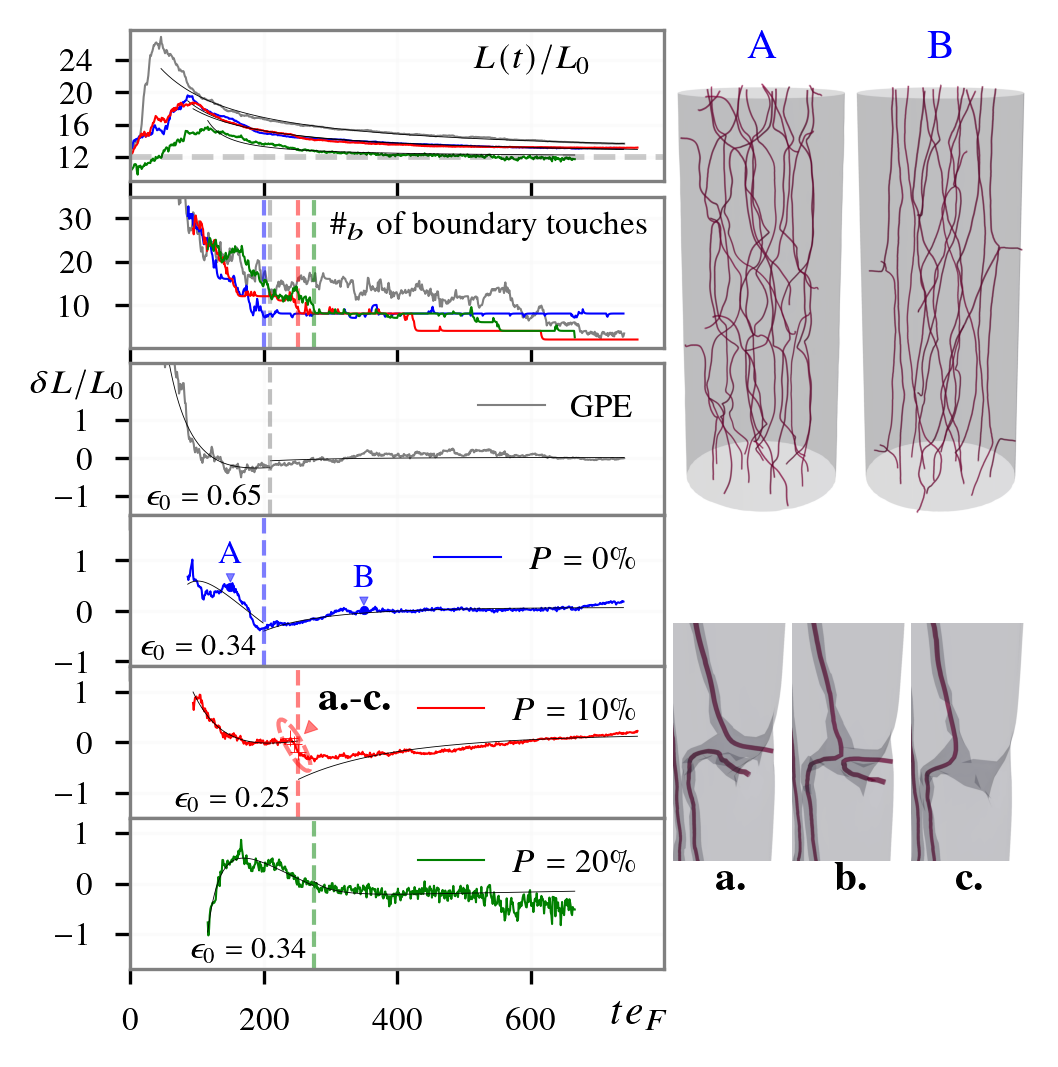

In [2]:
%pylab inline --no-import-all
from collections import OrderedDict
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg
from matplotlib.patches import Ellipse

from uncertainties.unumpy import nominal_values

import analysis, analysis.mpl_styles

FitDecay = analysis.FitDecay

data = analysis.VortexData()

colors = {
    "SLDAP0": 'b',
    "SLDAP10": 'r',
    "SLDAP20": 'g',
    "ETF": 'grey',
}

labels = {
    "SLDAP0": r'$P=0\%$',
    "SLDAP10": r'$P=10\%$',
    "SLDAP20": r'$P=20\%$',
    "ETF": r'$\text{GPE}$',
}

slice0 = 260
slice1 = 220
slice2 = 220

# points of snaphots
t1 = slice0 + 150
t2 = slice0 + 200
t3 = slice0 + 350
t11 = slice1 + 240
t12 = slice1 + 246
t13 = slice1 + 252

tA = 150
tB = 350

insets = OrderedDict([
    ("a", (460.0 - 220, "insets/inset2_qt1dyn_t=460.0.png")),
    ("b", (466.0 - 220, "insets/inset2_qt1dyn_t=466.0.png")),
    ("c", (472.0 - 220, "insets/inset2_qt1dyn_t=472.0.png")),
    ("A", (tA, "insets/inset1_qt0dyn_t=410.0.png")),  # 410 - 260
    ("B", (tB, "insets/inset1_qt1dyn_t=460.0.png")),  # 460 - 90???
])

keys = data.keys()
# Order specified explicitly here instead
keys = ["ETF", "SLDAP0", "SLDAP10", "SLDAP20"]

sigma_window_length = 101

# Normalize by L0=100.0 so that number = number of vortices in box
L0 = 100.0

with analysis.mpl_styles.prl_style("figure", height="width"):
    fig = plt.figure(constrained_layout=False)
    gs = gridspec.GridSpec(ncols=2,
                           nrows=8,
                           height_ratios=(1, 0.1, 1, 0.1, 1, 1, 1, 1),
                           width_ratios=(3, 2),
                           hspace=0.0,
                           wspace=0.02,
                           figure=fig,
                           left=0.1,
                           right=0.98,
                           top=0.99,
                           bottom=0.07)
    gs_3d = gridspec.GridSpecFromSubplotSpec(ncols=2,
                                             nrows=1,
                                             subplot_spec=gs[:5, 1],
                                             wspace=0.01)
    gs_r = gridspec.GridSpecFromSubplotSpec(ncols=3,
                                            nrows=1,
                                            subplot_spec=gs[5:, 1],
                                            wspace=0.01)

    # Main axis
    ax0 = fig.add_subplot(gs[0, 0])
    ax_bt = fig.add_subplot(gs[2, 0], sharex=ax0)
    axs = [fig.add_subplot(gs[_n, 0], sharex=ax0) for _n in range(4, 8)]
    ax_bot = axs[-1]

    # 3D insets
    _args = dict(parent_axes=ax0,
                 borderpad=0,
                 width="100%",
                 height="100%",
                 bbox_transform=ax0.transAxes)
    ax_A = fig.add_subplot(gs_3d[0])
    ax_B = fig.add_subplot(gs_3d[1])

    # Right insets
    axs_r = list(map(fig.add_subplot, gs_r))

    inset_axs = dict(zip("abc", axs_r), A=ax_A, B=ax_B)

    for key, ax in zip(keys, axs):
        res = data.load(key, sigma_window_length=sigma_window_length)
        t_, L_ = res.t_, res.L_ / L0
        tb = res.tb_
        i_max = np.argmax(L_)
        t_max = t_[i_max]
        ib = np.argmin(abs(t_ - tb))
        c = colors[key]
        inds = np.where(t_ > 0)[0]

        # Fits
        fixed = dict(eps=1, Linf=res.Linf_)
        fixed0 = {}
        fixed1 = dict(eps=1, Linf=res.Linf_)
        _args = dict(res=res, maxfev=100000, sigma=True)

        p, _inds = FitDecay.fit(i=0, i1=None, fixed=fixed, **_args)
        p0, _inds0 = FitDecay.fit(i=0, i1=ib, fixed=fixed0, **_args)
        p1, _inds1 = FitDecay.fit(i=ib - i_max, i1=None, fixed=fixed1, **_args)
        p, p0, p1 = map(nominal_values, [p, p0, p1])

        # Background fit which we subtract to emphasize deviation
        L0_ = FitDecay.L(t_, *p) / L0
        dL_ = L_ - L0_

        # Top orientation plot.
        ax0.plot(t_[inds], L_[inds], c=c, lw=0.5, label=labels[key])

        # Individual fits.
        inds = _inds
        ax.plot(t_[_inds], dL_[_inds], c=c, lw=0.5, label=labels[key])
        if key == "SLDAP0":
            # Annotations locations SLDAP0
            ts = tA, tB
            is_ = iA, iB = [np.argmin(abs(_t - t_)) for _t in ts]
            dLs = dLA, dLB = [dL_[_i] for _i in is_]
            ax.plot(ts, dLs, '.', c=c, mew=0.2, ms=4)
            xy = np.array((tA, dLA))
            for label, xy in [("A", (tA, dLA)), ("B", (tB, dLB))]:
                # This puts the A and B labels a constant offset away.
                ax.annotate(
                    label,
                    xy=xy,
                    xycoords='data',
                    xytext=(0, 4),
                    textcoords='offset points',
                    color=c,
                    size=8,
                    arrowprops=dict(
                        facecolor=c,
                        edgecolor=c,
                        alpha=0.5,
                        headlength=2,
                        headwidth=2,
                        width=1,
                        shrink=0.3,
                    ),
                    # https://stackoverflow.com/a/43051701/1088938
                    bbox=dict(pad=-2, facecolor="none", edgecolor="none"),
                    horizontalalignment='center',
                    verticalalignment='bottom',
                )

        args = dict(lw=0.2, alpha=1.0)
        _t = t_[_inds]
        ax0.plot(_t, FitDecay.L(_t, *p) / L0, ls='-', c='k', **args)
        _t = t_[_inds0]
        ax.plot(_t, (FitDecay.L(_t, *p0) - FitDecay.L(_t, *p)) / L0,
                ls='-',
                c='k',
                **args)
        _t = t_[_inds1]
        ax.plot(_t, (FitDecay.L(_t, *p1) - FitDecay.L(_t, *p)) / L0,
                ls='-',
                c='k',
                **args)

        # Boundary touches
        ax_bt.plot(t_[inds],
                   res.boundary_touches[inds],
                   c=c,
                   lw=0.5,
                   label=labels[key])

        # Vertical lines at tb
        ax.axvline([tb], c=c, ls="--", lw=1, alpha=0.5)
        ax_bt.axvline([tb], c=c, ls="--", lw=1, alpha=0.5)

        # Annotations
        eps_tweak = 0
        if key == "SLDAP20":
            eps_tweak = 0.2
        if key == "SLDAP0":
            eps_tweak = -0.4

        ax.text(res.tb_ - 10,
                -1.4 - eps_tweak,
                rf"$\epsilon_0={p0[0]:.2f}$",
                ha='right',
                va='bottom',
                size=7)

        if key == "SLDAP10":
            # Annotations locations SLDAP10
            ts = ta, tb, tc = [insets[_l][0] for _l in "abc"]
            is_ = ia, ib, ic = [np.argmin(abs(_t - t_)) for _t in ts]
            dLs = dLa, dLb, dLc = [(L_ - L0_)[_i] for _i in is_]

            # Hard to get working if aspect ratio is not 1.
            angle_deg = 180 / np.pi * np.angle((dLc + 1j * tc) -
                                               (dLa + 1j * ta))
            angle_deg = -1
            ax.plot(ts, dLs, '+', c=colors[key], mew=0.2, ms=4)
            ax.add_artist(
                Ellipse(((ta + tc) / 2, (dLa + dLc) / 2),
                        width=4 * abs(tc - ta),
                        height=2 * abs(dLc - dLa),
                        fill=False,
                        color=colors[key],
                        linestyle=(0, (5, 1)),
                        linewidth=1,
                        alpha=0.5,
                        angle=angle_deg))
            ax.annotate(
                r"\textbf{a.}-\textbf{c.}",
                xy=(tb, dLb),
                xycoords='data',
                xytext=(6, 6),
                textcoords='offset points',
                color='k',
                arrowprops=dict(
                    facecolor=c,
                    edgecolor=c,
                    alpha=0.5,
                    headlength=3,
                    headwidth=3,
                    width=1,
                    shrink=0.4,
                ),
                # https://stackoverflow.com/a/43051701/1088938
                bbox=dict(pad=-2, facecolor="none", edgecolor="none"),
                horizontalalignment='left',
                verticalalignment='bottom',
            )
        ax.legend(loc='upper right', frameon=False)
        ax.set(ylim=(-1.5 - eps_tweak, 1.5 - eps_tweak), yticks=[-1, 0, 1])

    # Insets
    for _k in insets:
        t_, filename = insets[_k]
        img = mpimg.imread(filename)
        if _k in "AB":
            # Trim these a bit
            img = img[:, 90:-90, :]
        else:
            img = img[:, :-80, :]
        inset_axs[_k].imshow(img)

    # Adjust axes with lines, labels, etc.
    ax0.axhline([res.Linf_ / L0], ls="--", c='k', alpha=0.2)

    for ax in [ax0, ax_bt] + axs:
        if ax is ax_bot:
            continue
        plt.setp(ax.xaxis.get_ticklabels(), visible=False)

    ax0.set(yticks=[12, 16, 20, 24])
    axs[0].set(ylim=(-1.5, 2.5))

    # Add labels inline:
    for ax, pos, label in [(ax0, (0.75, 0.9), r"$L(t)/L_0$"),
                           (axs[0], (-0.1, 0.95), r"$\delta L/L_0$"),
                           (ax_bt, (0.67, 0.9), r"$\#_b$ of boundary touches")
                           ]:
        ax.text(pos[0],
                pos[1],
                label,
                ha='center',
                va='top',
                size=8,
                transform=ax.transAxes)

    ax_bt.set(ylim=(0, 35), yticks=[10, 20, 30])

    ax_bot.text(0.9,
                -0.17,
                fr"$t e_F$",
                ha='left',
                va='top',
                transform=ax_bot.transAxes)

    ax_bot.set(
        xlim=[0, 800.],
        xticks=[0, 200, 400, 600],
    )

    for _ax, _l in zip(axs_r, 'abc'):
        _ax.axis('off')
        _ax.text(0.5,
                 0,
                 fr"\textbf{{{_l}.}}",
                 ha='center',
                 va='top',
                 transform=_ax.transAxes)
    for _ax, _l in zip([ax_A, ax_B], 'AB'):
        _ax.axis('off')
        _ax.text(0.5,
                 1,
                 fr"{_l}",
                 ha='center',
                 va='top',
                 c=colors["SLDAP0"],
                 transform=_ax.transAxes)
    # Need to do this INSIDE the context to get LaTeX working.
    # https://github.com/matplotlib/matplotlib/issues/13431
    display(fig)
    plt.savefig("fig3-alt-eps1.pdf")
    plt.close('all')

# Analysis


We are trying to see if the turbulence is modeled by something like:

$$
  \diff{L}{t} = -\alpha (L- L_\infty)^{1+\epsilon}, \qquad
  L- L_\infty = \frac{1}{\bigl(\alpha \epsilon (t-t_a) +(L_a - L_\infty)^{-\epsilon}\bigr)^{1/\epsilon}}
  = \frac{1}{\bigl(\alpha\epsilon(t-t_0)\bigr)^{1/\epsilon}}
$$

where

$$
  t_0 = t_a - \frac{1}{\alpha \epsilon (L_a - L_\infty)^{\epsilon}}.
$$

Vinen turbulence suggests that $\epsilon = 1$.

## Boundary Touches

During the evolution of the turbulence, we see that the number of vortices touching the boundaries decreases rapidly until a time $t_b e_F \approx 200$ where it flattens out.  We hypothesize that the scaling behavior typical of Vinen turbulence should apply after this time, but that before, and additional mechanism is present.  The following plot shows how we choose $t_b$.  For $t < t_b$, the number of boundary touches $\#_b$ decays, then fluctuates about a constant value for $t > t_b$:

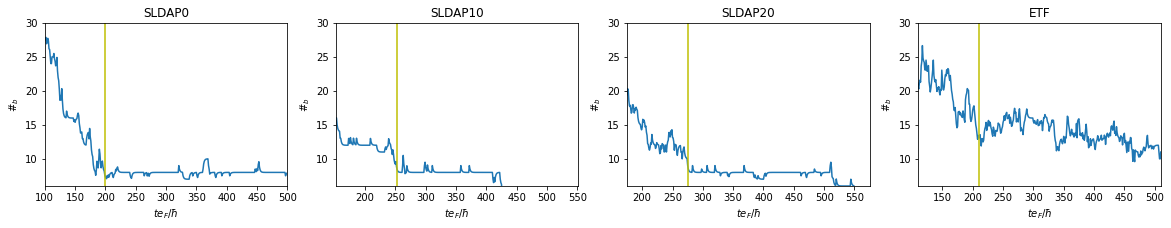

In [3]:
%autoreload
import analysis, analysis.mpl_styles

data = analysis.VortexData()
N = len(data.keys())
fig, axs = plt.subplots(1, N, figsize=(N * 5, 3))
for key, ax in zip(data.keys(), axs):
    res = data.load(key)

    ax.plot(res.t_, res.boundary_touches)
    ax.axvline([res.tb_], c='y')
    ax.set(xlim=(res.tb_ - 100, res.tb_ + 300),
           ylim=(6, 30),
           title=key,
           xlabel=r"$te_F/\hbar$",
           ylabel=r"$\#_b$")

## Data Summary

Here we load all of the data and plot it for reference.  We do not use everything in our analysis.

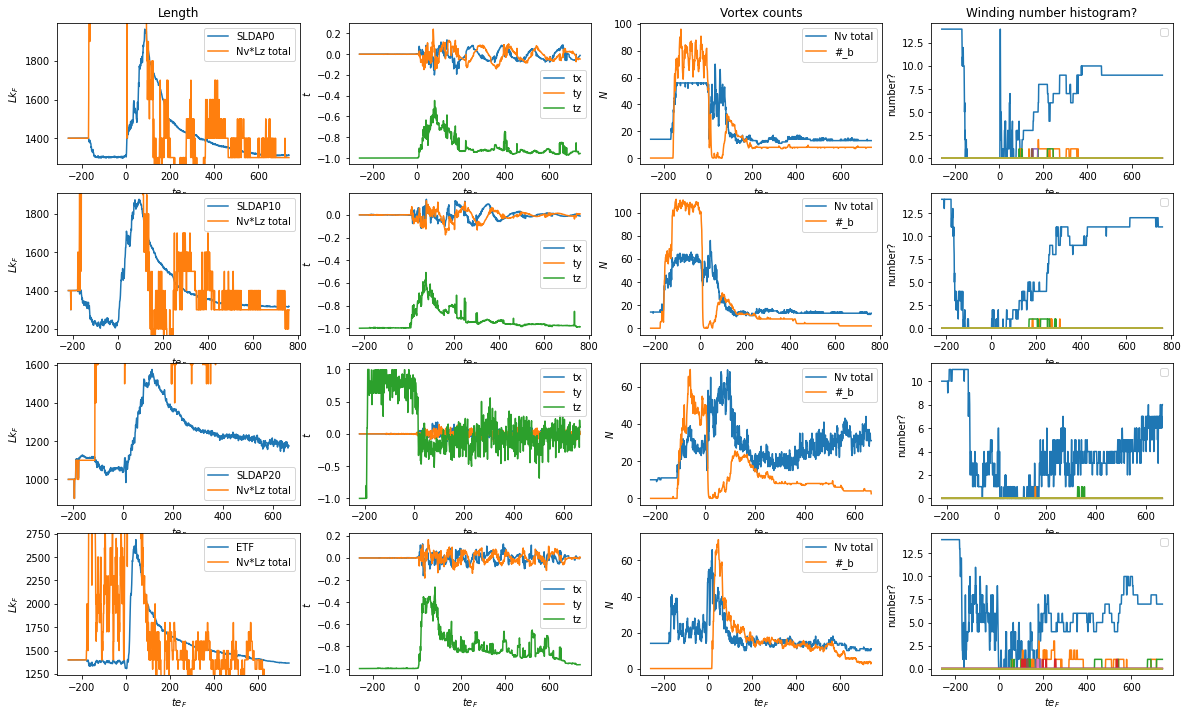

In [4]:
%autoreload
import analysis.data
d = analysis.data.VortexData()
key = d.keys()[0]
res = d.load(key)
d.plot()

# Derivative Analysis

We start by directly plotting $-\dot{L}$ vs $L-L_\infty$ on a log-log plot, which will be linear if the decay behaves as discussed above:

$$
  \ln \left(- \diff{L}{t}\right) = \ln \alpha + (1+\epsilon)\ln(L - L_\infty).
$$

Note: the derivatives are quite sensitive to noise, so we smooth with a [Savitzky-Golay filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html) with varying window lengths `di`.  *(This is an integer in terms of the number of time-steps, but our spacing is $\d{t} e_F/\hbar = 1$ so the window length in time is the same in natural units.)*

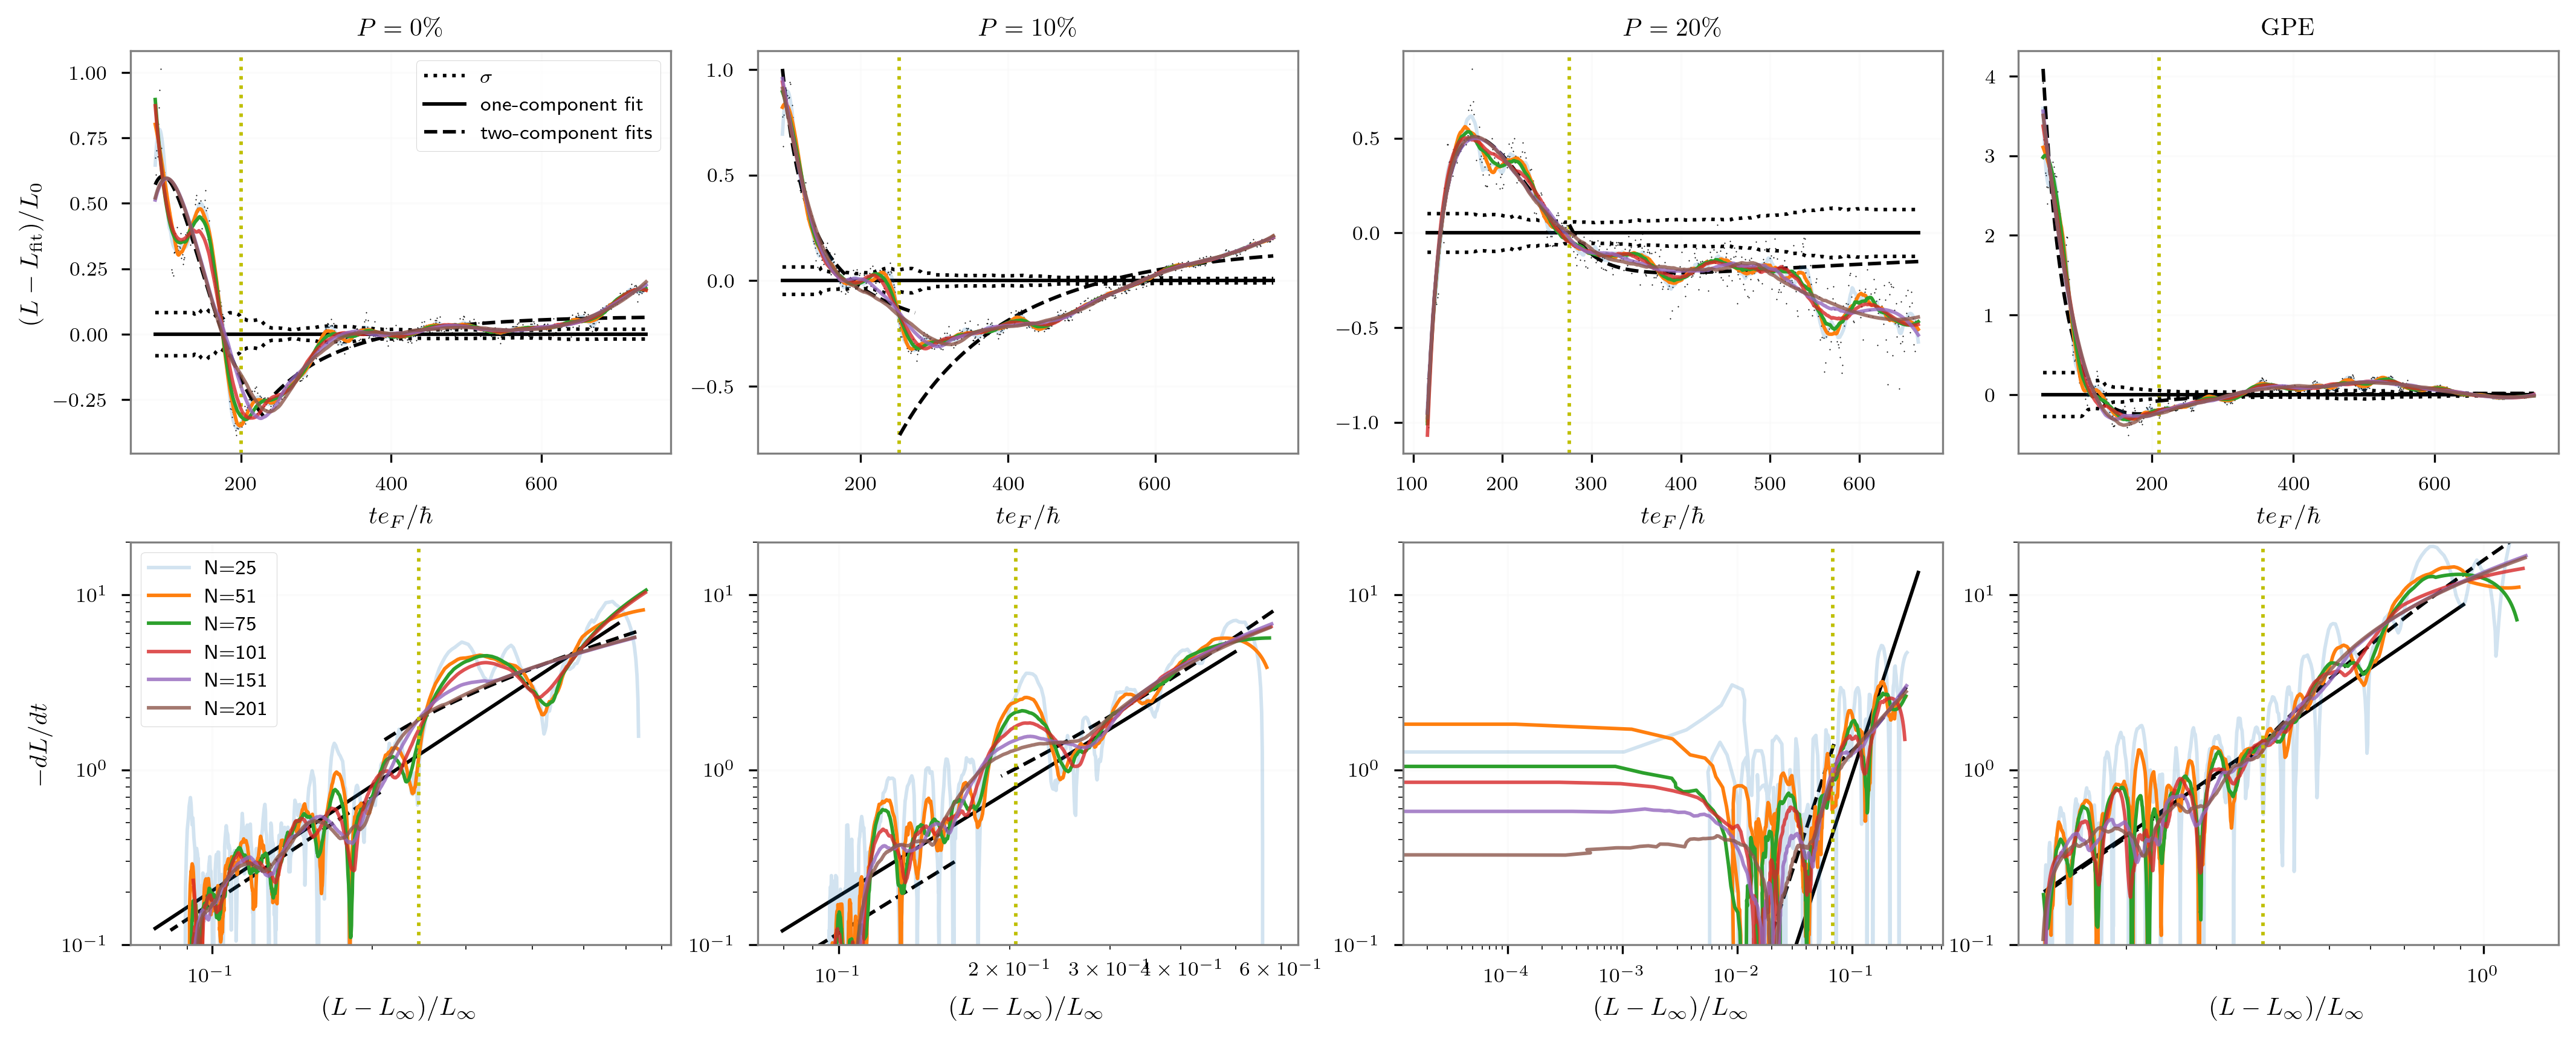

In [5]:
%autoreload
from scipy.signal import savgol_filter

import analysis, analysis.mpl_styles

data = analysis.VortexData()


def filter(t_, L_, d=0, window_length=11, polyorder=3):
    """Return `y(x)` or dersmoothed with a Savitzky-Golay filter."""
    dt_ = np.diff(t_)
    assert np.allclose(dt_.mean(), dt_)
    dt_ = dt_.mean()
    dL__dt_ = savgol_filter(L_,
                            window_length=window_length,
                            polyorder=polyorder,
                            deriv=d,
                            delta=dt_)
    return dL__dt_


labels = {
    "SLDAP0": r'$P=0\%$',
    "SLDAP10": r'$P=10\%$',
    "SLDAP20": r'$P=20\%$',
    "ETF": r'$\rm{GPE}$',
}

window_lengths = [25, 51, 75, 101, 151, 201]
alphas = [0.2, 1.0, 1.0, 0.8, 0.8, 0.8]
args = dict(window_length=101, polyorder=3)

#smooth_order = 7  # Polynomial smoothing
smooth_order = None  # Use L_fit for smoothing

N = len(data.keys())

with analysis.mpl_styles.prl_style("figure*", height=f"{2 * 4/ (N*5)}*width"):
    factor = 0.7
    fig, axs = plt.subplots(2, N, figsize=(factor * N * 5, factor * 2 * 4), constrained_layout=True)
    #fig, axs = plt.subplots(2, N, constrained_layout=True)

    for _col, (key, ax0, ax1) in enumerate(zip(data.keys(), axs[0], axs[1])):
        res = data.load(key)
        L0 = data.Lz_
        Linf = res.Linf_

        # Fits
        fixed = dict(eps=1, Linf=Linf)
        fixed0 = {}
        fixed1 = dict(eps=1, Linf=Linf)
        _args = dict(res=res, maxfev=100000, sigma=True)

        p, _inds = FitDecay.fit(i=0, i1=None, fixed=fixed, **_args)
        p0, _inds0 = FitDecay.fit(i=0, i1=ib, fixed=fixed0, **_args)
        p1, _inds1 = FitDecay.fit(i=ib - i_max, i1=None, fixed=fixed1, **_args)
        p, p0, p1 = map(nominal_values, [p, p0, p1])

        tb = res.tb_
        Lb = res.L_[np.argmin(abs(res.t_ - tb))]
        inds = slice(np.argmax(res.L_), None)  # Start at i_max
        ts, Ls, sigmas = res.t_[inds], res.L_[inds], res.sigma_L_[inds]

        if smooth_order is None:
            Ls_fit_ = FitDecay.L(res.t_, *p)
        else:
            Ls_fit_ = np.polyval(np.polyfit(ts, Ls, deg=smooth_order), res.t_)
        Ls_fit = Ls_fit_[inds]

        ax0.plot(ts, (Ls - Ls_fit) / L0, '.k', ms=1)

        # Sigmas
        ax0.plot(ts, -sigmas / L0, ':k', label='$\sigma$')
        ax0.plot(ts, sigmas / L0, ':k')

        ax0.axvline([tb], c='y', ls=':')
        ax0.set(title=labels[key], xlabel=r"$t e_F/\hbar$")
        for (_p, _i, _kw, _label) in [
            (p, _inds, dict(ls="-", c='k'), 'one-component fit'),
            (p0, _inds0, dict(ls="--", c='k'), 'two-component fits'),
            (p1, _inds1, dict(ls="--", c='k'), None)
        ]:
            _t = res.t_[_i]
            _L, _dL_dt = FitDecay.L(_t, *_p), FitDecay.L(_t, *_p, d=1)
            ax0.plot(_t, (_L - Ls_fit_[_i]) / L0, label=_label, **_kw)
            ax1.loglog(_L / Linf - 1, -_dL_dt, **_kw)

        for args['window_length'], alpha in zip(window_lengths, alphas):
            # Smoothed quantities with a trailing underscore
            Ls_ = savgol_filter(Ls, deriv=0, **args)
            dL_dts_ = savgol_filter(Ls, deriv=1, **args)
            l = ax0.plot(ts, (Ls_ - Ls_fit) / L0, alpha=alpha)[0]
            ax1.loglog(Ls_ / Linf - 1,
                       -dL_dts_,
                       c=l.get_c(),
                       alpha=alpha,
                       label=f"N={args['window_length']}")
        ax1.set(ylim=(0.1, 20), xlabel=r"$(L - L_\infty)/L_\infty$")
        ax1.axvline([Lb / Linf - 1], c='y', ls=':')
        if _col == 0:
            ax0.legend()
            ax1.legend()
            ax0.set(ylabel=r"$(L-L_{\mathrm{fit}})/L_0$")
            ax1.set(ylabel="$-dL/dt$")
    plt.savefig('derivatives.pdf')

## Variance

Here we try to find a reasonable "variance" for the data by fitting small regions of various lengths $\delta_t$ and then determining what standard deviation $\sigma$ would gives a $\chi^2 \approx 1$.  This allows us to characterize the fluctuations.  Using this value for $\sigma$, we can then assess how well the global models work.

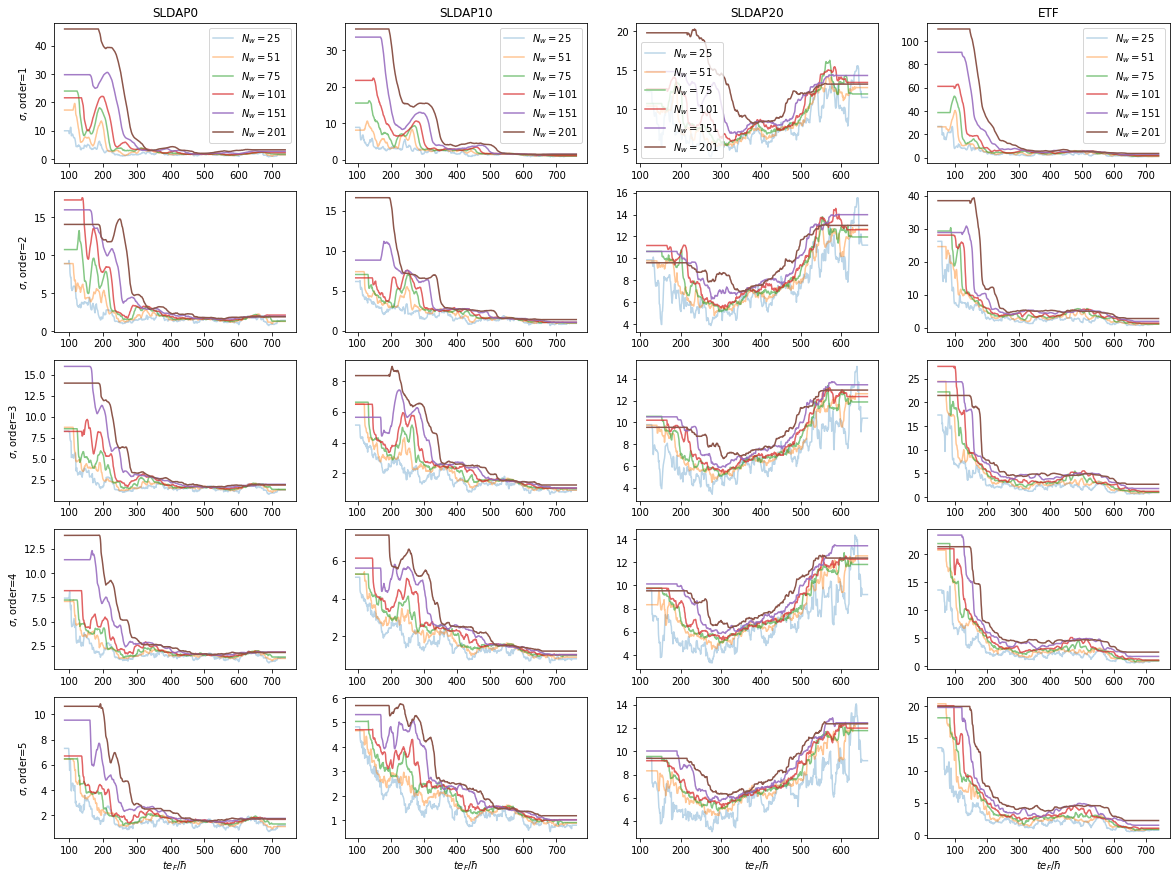

In [6]:
# Try comparing different window sizes with this many points.
polyorders = [1, 2, 3, 4, 5]
window_lengths = [25, 51, 75, 101, 151, 201]
fig, axs = plt.subplots(len(polyorders), len(data.keys()), figsize=(len(data.keys()) * 5, len(polyorders) * 3))

for _row, (polyorder, _axs) in enumerate(zip(polyorders, axs)):
    for _col, (key, ax) in enumerate(zip(data.keys(), _axs)):
        for window_length, alpha in zip(window_lengths, np.linspace(0.3, 1, len(window_lengths))):
            res = data.load(key, sigma_window_length=window_length, sigma_polyorder=polyorder)
            inds = slice(np.argmax(res.L_), None)
            l, = ax.plot(res.t_[inds], res.sigma_L_[inds], label=fr"$N_w={window_length}$", alpha=alpha)
        if _row == 0:
            ax.legend()
            ax.set(title=f"{key}")
        if _col == 0:
            ax.set(ylabel=fr"$\sigma$, order={polyorder}")
        if _row == axs.shape[0]-1:
            ax.set(xlabel=r'$t e_F/\hbar$')
plt.savefig("sigmas.pdf")

The cubic fits seems to stabilize reasonably.  Higher order is probably not an advantage here as it allows too much freedom: we are trying to average over this window.  Linear, however, is too restrictive.  Quadratic order would work too.

# Single Component Fits

Here we try fitting the single exponent decay model:

$$
  \diff{L}{t} = -\alpha (L- L_\infty)^{1+\epsilon}, \qquad
  L- L_\infty = \frac{1}{\bigl(\alpha \epsilon (t-t_a) +(L_a - L_\infty)^{-\epsilon}\bigr)^{1/\epsilon}}
  = \frac{1}{\bigl(\alpha\epsilon(t-t_0)\bigr)^{1/\epsilon}},\\
  t_0 = t_a - \frac{1}{\alpha \epsilon (L_a - L_\infty)^{\epsilon}}.
$$

For fitting, we use parameters $\alpha$, $L_a$, $L_\infty$, and $\epsilon$ where $t_a$ is the initial time in our fit window.

In [7]:
%autoreload
from collections import namedtuple
from functools import partial
import scipy.linalg

sp = scipy
from uncertainties import ufloat, correlated_values, unumpy as unp
from uncertainties.unumpy import nominal_values, std_devs

import analysis, analysis.mpl_styles

data = analysis.VortexData()
datas = {_k: data.load(_k) for _k in data.keys()}
res = datas['SLDAP0']


def uplot(x, y, **kw):
    """Fill between uncertanty bounds."""
    y, dy = unp.nominal_values(y), unp.std_devs(y)
    plt.fill_between(x, y - dy, y + dy, **kw)

# Full Fits

With these standard deviations, we now compute the best fits:

1. To the whole set of data.
2. Two independent fits to the data before $t_b$ and the data after `t_b`.

We compare the reduced $\chi^2_r$ values for these fits.

In [8]:
%autoreload
from collections import namedtuple
from uncertainties import nominal_value
import analysis, analysis.mpl_styles

FitDecay = analysis.FitDecay

data = analysis.VortexData()

Results2 = namedtuple('Results2', ['p_t_L_inds', 'chi2_rs'])


def analyze1(key, window_length, fixed0, fixed1=None, fixed=None):
    """Compute the reduced chi^2 for fits to all data, then
    for two individual fits split at tb."""
    if fixed1 is None:
        fixed1 = fixed0
    if fixed is None:
        fixed = fixed1
    res = data.load(key, sigma_window_length=window_length)
    sigma = res.sigma_L_
    i_max = np.argmax(res.L_)
    i_end = len(res.t_)
    ib = np.argmin(abs(res.t_ - res.tb_))
    fit_args = dict(res=res, maxfev=100000, sigma=sigma)
    p, inds = FitDecay.fit(i=0, i1=None, fixed=fixed, **fit_args)
    p0, inds0 = FitDecay.fit(i=0, i1=ib, fixed=fixed0, **fit_args)
    p1, inds1 = FitDecay.fit(i=ib - i_max, i1=None, fixed=fixed1, **fit_args)
    ts, Ls, sigmas = res.t_[inds], res.L_[inds], sigma[inds]
    ts0, Ls0, sigmas0 = res.t_[inds0], res.L_[inds0], sigma[inds0]
    ts1, Ls1, sigmas1 = res.t_[inds1], res.L_[inds1], sigma[inds1]

    # Compute chi^2_r
    nu1 = len(ts) - (len(p) - len(fixed))
    nu2 = (len(ts0) + len(ts1) -
           (len(p0) + len(p1) - len(fixed0) - len(fixed1)))
    nu12 = (len(ts0) + len(ts1) -
            (len(p0) + len(p1) - len(fixed0) - len(fixed1)))
    chi2_r = ((
        (nominal_values(FitDecay.L(ts, *p)) - Ls)**2 / sigmas**2).sum()) / nu1
    chi2_r2 = ((nominal_values(FitDecay.L(ts1, *p1)) - Ls1)**2 /
               sigmas1**2).sum() / nu2
    chi2_r12 = ((
        (nominal_values(FitDecay.L(ts0, *p0)) - Ls0)**2 / sigmas0**2).sum() +
                ((nominal_values(FitDecay.L(ts1, *p1)) - Ls1)**2 /
                 sigmas1**2).sum()) / nu12

    p_t_L_inds = [(p0, ts0, Ls0, inds0), (p1, ts1, Ls1, inds1),
                  (p, ts, Ls, inds)]
    results2 = Results2(p_t_L_inds=p_t_L_inds,
                        chi2_rs=[chi2_r, chi2_r2, chi2_r12])
    return results2


def analyze2(key, window_lengths, fixed0, fixed1, fixed):
    for window_length in window_lengths:
        results = analyze1(key=key,
                           window_length=window_length,
                           fixed0=fixed0,
                           fixed1=fixed1,
                           fixed=fixed)
        chi2_r, chi2_r2, chi2_r12 = results.chi2_rs
        ps = [_ptli[0] for _ptli in results.p_t_L_inds]
        print(f"{key:7}, {window_length:5}: " + ", ".join([
            f"chi2_r={chi2_r:>5.2f}", f"chi2_r2={chi2_r2:>5.2f}",
            f"chi2_r12={chi2_r12:>5.2f}", f"reduction={chi2_r12/chi2_r:>4.2f}",
            "eps: " +
            ", ".join([f"{nominal_value(_p.eps):>3f}" for _p in ps])
        ]))

In [9]:
args = dict(window_lengths=[25, 51, 75, 101, 151, 201],
            fixed=dict(Linf=res.Linf_),
            fixed0={},
            fixed1=dict(Linf=res.Linf_))
print("Linf fixed for _ and 1")
for key in data.keys():
    analyze2(key=key, **args)
    print()

print("Linf and eps=1 fixed _ and 1")
args.update(fixed=dict(eps=1, Linf=res.Linf_),
            fixed0={},
            fixed1=dict(eps=1, Linf=res.Linf_))
for key in data.keys():
    analyze2(key=key, **args)
    print()

print("Linf and eps=1 fixed for 1")
args.update(fixed=dict(Linf=res.Linf_),
            fixed0={},
            fixed1=dict(eps=1, Linf=res.Linf_))
for key in data.keys():
    analyze2(key=key, **args)
    print()

print("Unconstrained")
args.update(fixed={}, fixed0={}, fixed1={})
for key in data.keys():
    analyze2(key=key, **args)
    print()

Linf fixed for _ and 1
SLDAP0 ,    25: chi2_r=32.28, chi2_r2= 8.90, chi2_r12=12.62, reduction=0.39, eps: -0.199998, 1.200224, 1.387572
SLDAP0 ,    51: chi2_r=21.78, chi2_r2= 7.06, chi2_r12= 8.96, reduction=0.41, eps: -0.199996, 1.217674, 1.375195
SLDAP0 ,    75: chi2_r=14.99, chi2_r2= 5.60, chi2_r12= 6.78, reduction=0.45, eps: -0.199999, 1.224668, 1.352592
SLDAP0 ,   101: chi2_r= 8.12, chi2_r2= 3.89, chi2_r12= 4.63, reduction=0.57, eps: 0.340051, 1.129531, 1.339601
SLDAP0 ,   151: chi2_r= 4.33, chi2_r2= 3.32, chi2_r12= 3.54, reduction=0.82, eps: 0.066461, 1.191714, 1.326386
SLDAP0 ,   201: chi2_r= 4.05, chi2_r2= 3.09, chi2_r12= 3.35, reduction=0.83, eps: 0.268331, 1.264517, 1.299662

SLDAP10,    25: chi2_r=72.76, chi2_r2=30.00, chi2_r12=31.11, reduction=0.43, eps: 0.548470, 2.221666, 1.516038
SLDAP10,    51: chi2_r=50.05, chi2_r2=19.93, chi2_r12=20.50, reduction=0.41, eps: 0.438095, 2.201748, 1.544352
SLDAP10,    75: chi2_r=38.76, chi2_r2=14.43, chi2_r12=14.86, reduction=0.38, eps: 0.3

SLDAP0 ,    51: chi2_r=18.56, chi2_r2= 4.70, chi2_r12= 6.61, reduction=0.36, eps: -0.199996, -0.200000, 0.850150
SLDAP0 ,    75: chi2_r=12.56, chi2_r2= 3.46, chi2_r12= 4.64, reduction=0.37, eps: -0.199999, -0.200000, 0.819198
SLDAP0 ,   101: chi2_r= 7.55, chi2_r2= 2.48, chi2_r12= 3.22, reduction=0.43, eps: 0.340051, -0.200000, 0.980595
SLDAP0 ,   151: chi2_r= 4.21, chi2_r2= 1.98, chi2_r12= 2.20, reduction=0.52, eps: 0.066461, -0.200000, 1.061385
SLDAP0 ,   201: chi2_r= 3.63, chi2_r2= 1.74, chi2_r12= 2.01, reduction=0.55, eps: 0.268331, -0.200000, 0.847318

SLDAP10,    25: chi2_r= 8.55, chi2_r2= 3.04, chi2_r12= 4.15, reduction=0.49, eps: 0.548470, -0.042719, 0.057040
SLDAP10,    51: chi2_r= 5.20, chi2_r2= 2.24, chi2_r12= 2.80, reduction=0.54, eps: 0.438095, -0.062049, 0.067712
SLDAP10,    75: chi2_r= 3.76, chi2_r2= 1.66, chi2_r12= 2.09, reduction=0.56, eps: 0.378197, -0.037995, 0.075825
SLDAP10,   101: chi2_r= 2.92, chi2_r2= 1.36, chi2_r12= 1.71, reduction=0.59, eps: 0.254358, -0.032706

In [10]:
keys = ['ETF', 'SLDAP0', 'SLDAP10']
args = dict(window_lengths=[101],
            fixed=dict(Linf=res.Linf_),
            fixed0={},
            fixed1=dict(Linf=res.Linf_))
print("Linf fixed for _ and 1")
[analyze2(key=key, **args) for key in keys]
print()

print("Linf and eps=1 fixed _ and 1")
args.update(fixed=dict(eps=1, Linf=res.Linf_),
            fixed0={},
            fixed1=dict(eps=1, Linf=res.Linf_))
[analyze2(key=key, **args) for key in keys]
print()

print("Linf and eps=1 fixed for 1")
args.update(fixed=dict(Linf=res.Linf_),
            fixed0={},
            fixed1=dict(eps=1, Linf=res.Linf_))
[analyze2(key=key, **args) for key in keys]
print()

print("Unconstrained")
args.update(fixed={}, fixed0={}, fixed1={})
[analyze2(key=key, **args) for key in keys]
print()

Linf fixed for _ and 1
ETF    ,   101: chi2_r=11.51, chi2_r2= 2.20, chi2_r12= 2.63, reduction=0.23, eps: 0.651782, 0.322684, 1.137297
SLDAP0 ,   101: chi2_r= 8.12, chi2_r2= 3.89, chi2_r12= 4.63, reduction=0.57, eps: 0.340051, 1.129531, 1.339601
SLDAP10,   101: chi2_r=32.76, chi2_r2=11.42, chi2_r12=11.78, reduction=0.36, eps: 0.254358, 2.218931, 1.555539

Linf and eps=1 fixed _ and 1
ETF    ,   101: chi2_r=12.89, chi2_r2= 6.56, chi2_r12= 6.98, reduction=0.54, eps: 0.651782, 1.000000, 1.000000
SLDAP0 ,   101: chi2_r=21.76, chi2_r2= 4.00, chi2_r12= 4.74, reduction=0.22, eps: 0.340051, 1.000000, 1.000000
SLDAP10,   101: chi2_r=75.96, chi2_r2=15.89, chi2_r12=16.24, reduction=0.21, eps: 0.254358, 1.000000, 1.000000

Linf and eps=1 fixed for 1
ETF    ,   101: chi2_r=11.51, chi2_r2= 6.56, chi2_r12= 6.98, reduction=0.61, eps: 0.651782, 1.000000, 1.137297
SLDAP0 ,   101: chi2_r= 8.12, chi2_r2= 4.00, chi2_r12= 4.74, reduction=0.58, eps: 0.340051, 1.000000, 1.339601
SLDAP10,   101: chi2_r=32.76, c

## Demonstration of Curve Fitting

Here is an extremely brief demonstration of curve fitting that shows how using the correct values of sigma gives a correct estimate of the parameters.  We fit the simple linear model

$$
  y(x) = ax + b, \qquad
  y_i = y(x_i) + e_i,
$$

where the errors $e_i$ are normally distributed with standard deviation $\sigma$.  By passing this to `curve_fit`, we get a correct estimate of the parameter errors as well as a reasonable reduced 

$$
  \chi^2_r = \frac{1}{\nu}\sum_i\frac{\abs{y_i - y(x_i)}^2}{\sigma^2} \approx 1, \qquad \nu = N - N_p,
$$

where there are $N$ data points $(x_i, y_i)$ and $N_p$ fitting parameters.

Populating the interactive namespace from numpy and matplotlib
a=1.9(1), b=-1.0(1): chi2_r=1.4


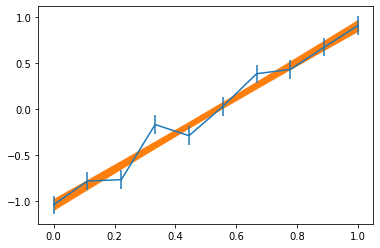

In [11]:
%pylab inline --no-import-all
from collections import namedtuple
import scipy.linalg
from scipy.optimize import curve_fit
sp = scipy

from uncertainties import ufloat, correlated_values, unumpy as unp
from uncertainties.unumpy import nominal_values, std_devs

import analysis

data = analysis.VortexData()
datas = {_k: data.load(_k) for _k in data.keys()}
res = datas['SLDAP0']

def uplot(x, y, **kw):
    """Fill between uncertanty bounds."""
    y, dy = unp.nominal_values(y), unp.std_devs(y)
    plt.fill_between(x, y - dy, y + dy, **kw)

x = np.linspace(0,1,10)
a, b = 2.0, -1.0
sigma = 0.1
np.random.seed(2)
y = a*x + b + sigma*np.random.normal(size=len(x))
plt.errorbar(x, y, sigma)
def f(x, a, b):
    return a*x + b
popt, pcov = curve_fit(f, x, y, absolute_sigma=True, sigma=sigma*np.ones_like(x))
p = correlated_values(popt, covariance_mat=pcov)
y_ = f(x, *p)
chi2_r = (nominal_values(y_ - y)**2/sigma**2).sum()/(len(y) - len(p))
print(f"a={p[0]:.2S}, b={p[1]:.2S}: chi2_r={chi2_r:.2g}")
uplot(x, y_, color='C1')

We start with a simple analysis, separating $t < t_b$ and $t > t_b$.

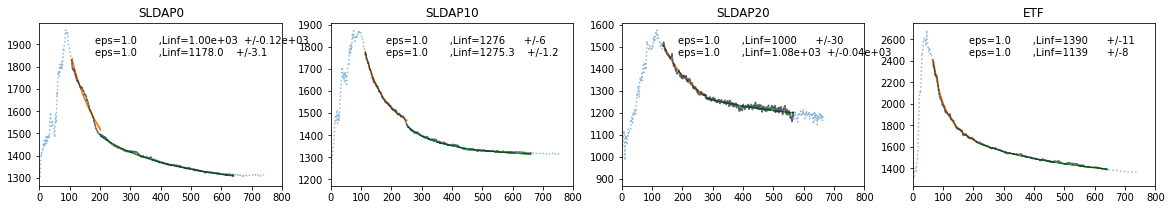

In [12]:
from ipywidgets import interact
from scipy.optimize import curve_fit
from uncertainties import unumpy as unp

from analysis import FitDecay

datas = {_k: data.load(_k) for _k in data.keys()}
i_max = max(len(datas[_k].t_) for _k in datas)


def draw2(i=0, i1=0, key='SLDA0', Linf_fix=False, eps=None):
    """
    Arguments
    ---------
    i, i1 : int
       Offsets from i_max and -1 to skip initial and final data.
    Linf_fix : False, True, float
       If False, then fit.  If True, then use the stored value.
    eps : None, float
       If None, then fit.
    """
    res = datas[key]
    i_max = np.argmax(res.L_)
    ib = np.argmin(abs(res.t_ - res.tb_))
    i_end = len(res.t_)
    i0, i1 = i_max + i, i_end - i1
    fixed = {}
    if Linf_fix == True:
        Linf_fix = res.Linf_
    if Linf_fix:
        fixed['Linf'] = Linf_fix
    if eps:
        fixed['eps'] = eps
    p0, inds0 = FitDecay.fit(i=i, i1=ib, res=res, fixed=fixed, maxfev=100000)
    p1, ins1 = FitDecay.fit(i=ib - i_max, i1=i1, res=res, fixed=fixed, maxfev=100000)
    plt.plot(res.t_, res.L_, 'C0:', alpha=0.5)
    for _n, (p, inds) in enumerate([(p0, slice(i0, ib)), (p1, slice(ib, i1))]):
        ts, Ls = res.t_[inds], res.L_[inds]
        plt.plot(ts, Ls, '-k', alpha=0.5)
        uplot(ts, FitDecay.L(ts, *p), color=f'C{_n+1}', lw=1)
    ax = plt.gca()
    ax.set(xlim=(0, 800))
    fields = ['eps', 'Linf']
    plt.text(0.23,
             0.8,
             "\n".join([
                 ",".join([f"{_f}={getattr(_p, _f):<10}" for _f in fields])
                 for _p in [p0, p1]
             ]),
             transform=ax.transAxes)
    plt.title(key)
    return p


fig, axs = plt.subplots(1, len(datas), figsize=(5 * len(datas), 1 * 3))
for ax, key in zip(axs, datas):
    plt.sca(ax)
    p = draw2(key=key, i=20, i1=100, eps=1.0, Linf_fix=False)

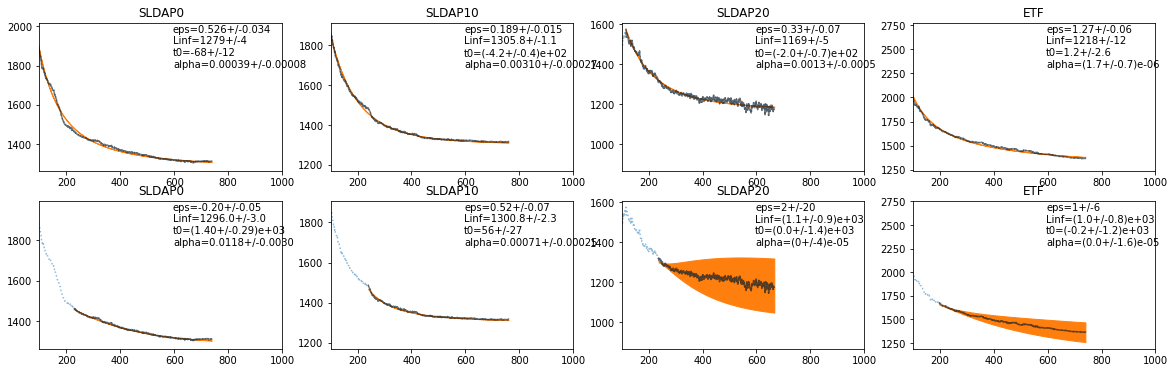

In [13]:
from ipywidgets import interact

datas = {_k: data.load(_k) for _k in data.keys()}
i_max = max(len(datas[_k].t_) for _k in datas)


def draw(f0=0, f1=1, key='SLDA0', Linf_fix=False, eps=None):
    """
    Arguments
    ---------
    f0, f1 : float
       Fraction of the way from the peak to the tail for start and end of interval.
    Linf_fix : False, True, float
       If False, then fit.  If True, then use the stored value.
    eps : None, float
       If None, then fit.
    """
    res = datas[key]
    i_max = np.argmax(res.L_)
    i_end = len(res.t_)
    di = i_end - i_max
    i0, i1 = i_max + int(f0*di), i_max + int(f1*di)
    fixed = {}
    if Linf_fix == True:
        Linf_fix = res.Linf_
    if Linf_fix:
        fixed['Linf'] = Linf_fix
    if eps:
        fixed['eps'] = eps
    p, inds = FitDecay.fit(i=i0-i_max, i1=i1, res=res, fixed=fixed)
    ts, Ls = res.t_[i0:i1], res.L_[i0:i1]
    plt.plot(res.t_, res.L_, 'C0:', alpha=0.5)
    plt.plot(ts, Ls, '-k', alpha=0.5)
    uplot(ts, FitDecay.L(ts, *p), color='C1', lw=1)
    ax = plt.gca()
    ax.set(xlim=(100, 1000))
    plt.text(0.55,
             0.7,
             "\n".join([f"{_f}={getattr(p, _f)}" for _f in FitDecay.Params._fields]),
             transform=ax.transAxes)
    plt.title(key)
    return p

fig, axs = plt.subplots(2, len(datas), figsize=(5 * len(datas), 2*3))
for ax0, ax1, key in zip(axs[0, :], axs[1, :], datas):
    plt.sca(ax0)
    p = draw(key=key)
    p0 = FitDecay.Params(*nominal_values(p))
    plt.sca(ax1)
    p = draw(f0=0.22, key=key)

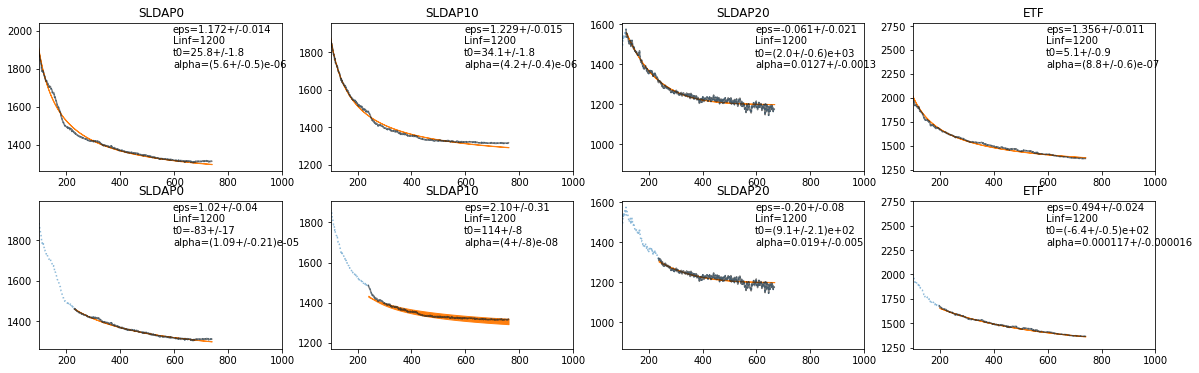

In [14]:
fig, axs = plt.subplots(2, len(datas), figsize=(5 * len(datas), 2*3))
for ax0, ax1, key in zip(axs[0, :], axs[1, :], datas):
    plt.sca(ax0)
    p = draw(key=key, Linf_fix=True)
    p0 = FitDecay.Params(*nominal_values(p))
    plt.sca(ax1)
    p = draw(f0=0.22, key=key, Linf_fix=True)

In [15]:
interact(key=data.keys(),
         f0=(0.0, 1.0, 0.01),
         f1=(0.0, 1.0, 0.01),
         Linf_fix=[False, True, 1100, 1200, 1300, 1400],
         eps=[None, 0.5, 1.0, 1.5],
)(draw)

interactive(children=(FloatSlider(value=0.0, description='f0', max=1.0, step=0.01), FloatSlider(value=1.0, des…

<function __main__.draw(f0=0, f1=1, key='SLDA0', Linf_fix=False, eps=None)>